<a href="https://colab.research.google.com/github/shivamanisuram/machine-learning-algortithms/blob/main/PCA_olivetti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
oli=datasets.fetch_olivetti_faces()




downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [4]:
oli

{'data': array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
         0.1570248 ],
        [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
         0.15289256],
        [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
         0.15289256],
        ...,
        [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
         0.19008264],
        [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
         0.60330576],
        [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
         0.38429752]], dtype=float32),
 'images': array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
          0.3305785 , 0.30578512],
         [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
          0.338843  , 0.3140496 ],
         [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
          0.338843  , 0.29752067],
         ...,
         [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
     

In [6]:
oli.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [8]:
oli.data.shape


(400, 4096)

In [9]:
oli.images.shape


(400, 64, 64)

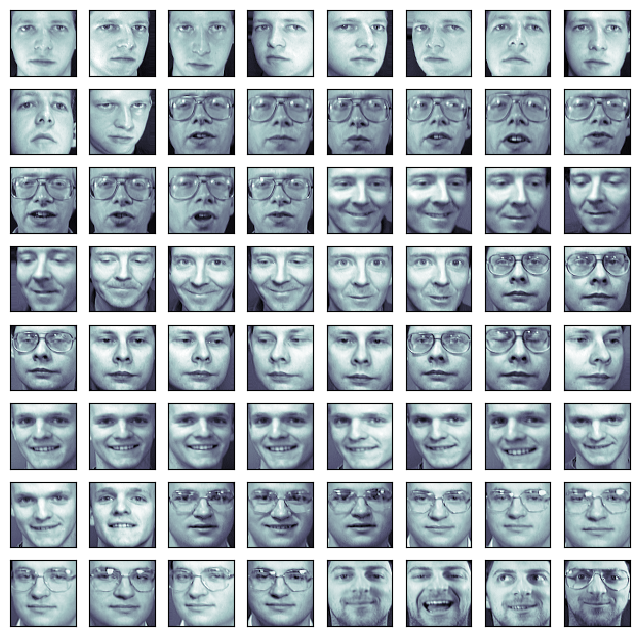

In [15]:
fig=plt.figure(figsize=(8,8))

for i in range(64):
    ax=fig.add_subplot(8,8,i+1,xticks=[],yticks=[])
    ax.imshow(oli.images[i],cmap=plt.cm.bone,interpolation='nearest')

In [25]:
x=oli.data
y=oli.target

In [26]:
pca=PCA()
pca.fit(x)

PCA()

In [27]:
pca.components_

array([[ 0.00419105,  0.00710948,  0.00933618, ..., -0.00018519,
        -0.00337969, -0.00318828],
       [ 0.02859137,  0.03328845,  0.03784649, ..., -0.02962782,
        -0.02721298, -0.02488898],
       [ 0.00135692, -0.00032573, -0.00019791, ..., -0.01541372,
        -0.01370986, -0.01188348],
       ...,
       [ 0.00223469,  0.02056655,  0.01515907, ..., -0.01273562,
        -0.0584899 , -0.07650334],
       [ 0.01714713,  0.02917688, -0.00942492, ...,  0.00159112,
         0.01249338, -0.00815264],
       [ 0.00213963, -0.01534078, -0.01476923, ...,  0.01173378,
         0.01628851,  0.00553281]], dtype=float32)

In [28]:
pca.components_.shape

(400, 4096)

In [35]:
k=0
total=0
while total<0.95:
    total+=pca.explained_variance_ratio_[k]
    k+=1
k

123

In [37]:
pca=PCA(n_components=k,whiten=True)
transformed_data=pca.fit_transform(x)
transformed_data.shape

(400, 123)

In [38]:
x_approx=pca.inverse_transform(transformed_data)
x_approx.shape

(400, 4096)

In [42]:
x_approx_images=x_approx.reshape((400,64,64))

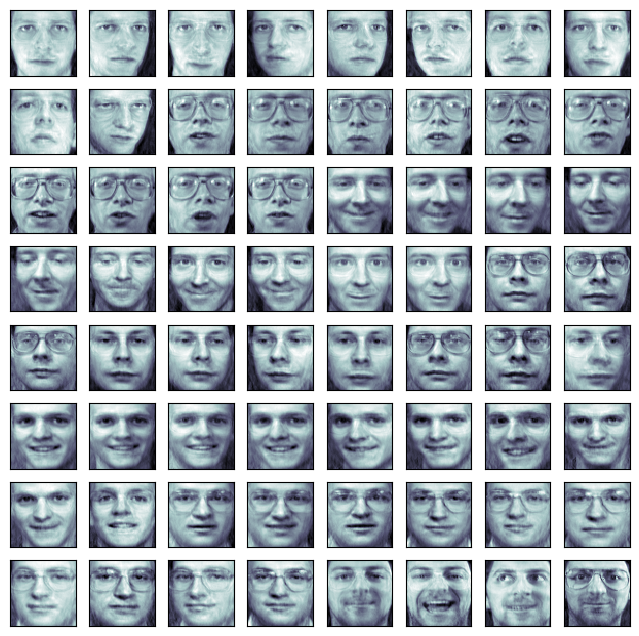

In [44]:
fig=plt.figure(figsize=(8,8))

for i in range(64):
    ax=fig.add_subplot(8,8,i+1,xticks=[],yticks=[])
    ax.imshow(x_approx_images[i],cmap=plt.cm.bone,interpolation='nearest')

In [45]:
eigenv=pca.components_

In [46]:
eigenv.shape

(123, 4096)

In [47]:
eigenfaces=eigenv.reshape((123,64,64))

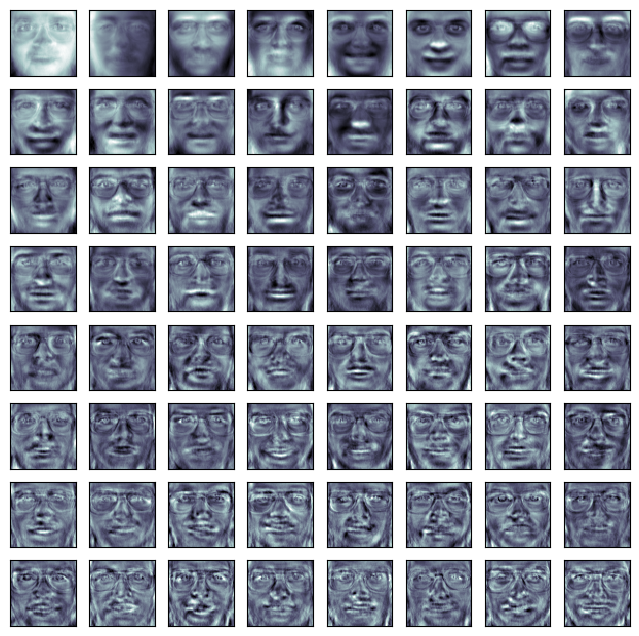

In [48]:
fig=plt.figure(figsize=(8,8))

for i in range(64):
    ax=fig.add_subplot(8,8,i+1,xticks=[],yticks=[])
    ax.imshow(eigenfaces[i],cmap=plt.cm.bone,interpolation='nearest')